<a href="https://colab.research.google.com/github/alonsosilvaallende/COVID-19/blob/master/COVID_19_deaths.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
plt.style.use('seaborn')

In [0]:
total_cases = pd.read_csv("https://covid.ourworldindata.org/data/total_cases.csv")
total_deaths = pd.read_csv("https://covid.ourworldindata.org/data/total_deaths.csv")

In [0]:
cases100_France = total_cases.query("France > 100")["France"]
days100_France = np.arange(len(cases100_France))
deaths100_France = total_deaths["France"].iloc[-len(cases100_France):]

In [0]:
cases100_Italy = total_cases.query("Italy > 100")["Italy"]
days100_Italy = np.arange(len(cases100_Italy))
deaths100_Italy = total_deaths["Italy"].iloc[-len(cases100_Italy):]

On February 24, Italy reaches more than 100 cases, on March 4 (9 days later) Italy closes schools and universities, and on March 8 Italy imposes lockdown.

On March 3, France reaches more than 100 cases, on March 16 (13 days later) France is closing schools and universities.

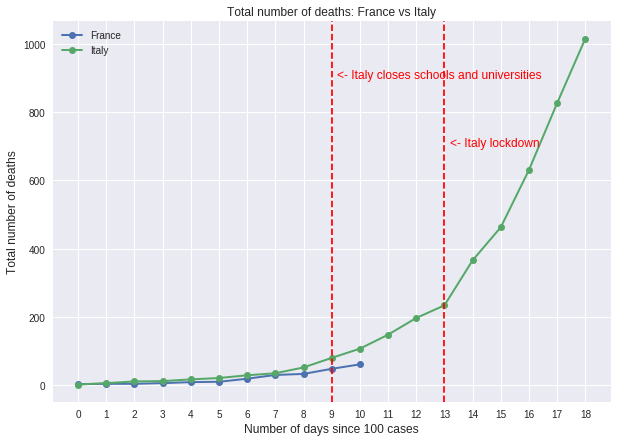

In [9]:
fig, ax = plt.subplots(figsize=(10,7))
plt.plot(days100_France, deaths100_France, label='France', linewidth=2, marker='o')
plt.plot(days100_Italy, deaths100_Italy, label='Italy',  linewidth=2, marker='o')
plt.axvline(9, color='red', linestyle='dashed')
plt.axvline(13, color='red', linestyle='dashed')
plt.annotate('<- Italy closes schools and universities', (9.2,900.0), color='red', fontsize='large')
plt.annotate('<- Italy lockdown', (13.2,700.0), color='red', fontsize='large')
ax.set_title('Total number of deaths: France vs Italy', fontsize='large')
ax.set_xlabel('Number of days since 100 cases', fontsize='large')
ax.set_ylabel('Total number of deaths', fontsize='large')
ax.set_xticks(np.arange(len(cases100_Italy)))
plt.legend()
plt.show()

In logarithmic scale:

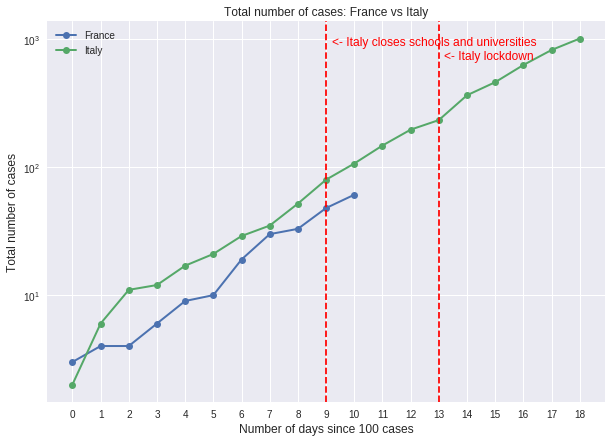

In [10]:
fig, ax = plt.subplots(figsize=(10,7))
plt.plot(days100_France, deaths100_France, label='France', linewidth=2, marker='o')
plt.plot(days100_Italy, deaths100_Italy, label='Italy',  linewidth=2, marker='o')
plt.axvline(9, color='red', linestyle='dashed')
plt.axvline(13, color='red', linestyle='dashed')
plt.annotate('<- Italy closes schools and universities', (9.2,900.0), color='red', fontsize='large')
plt.annotate('<- Italy lockdown', (13.2,700.0), color='red', fontsize='large')
ax.set_title('Total number of cases: France vs Italy', fontsize='large')
ax.set_xlabel('Number of days since 100 cases', fontsize='large')
ax.set_ylabel('Total number of cases', fontsize='large')
ax.set_xticks(np.arange(len(cases100_Italy)))
plt.yscale("log")
plt.legend()
plt.show()